<a href="https://colab.research.google.com/github/mehdi-nait/ENSIM-TinyML/blob/master/Projet_TinyML_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir Models
!mkdir Data

Now upload dataset to Data folder, and the models to Models folder

# Data comparaisons

## Data preparation and feature scaling

In [ ]:
cd Data

/content/Data


In [ ]:
!unzip -d Arduino "Data_arduino.zip"
!unzip -d TinyMotion "Tiny_motion_test_data.zip"
!unzip -d TinyMotion "Tiny_motion_train_data.zip"

In [ ]:
!rm *.zip


In [ ]:
import os
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

Sensor = os.listdir('Arduino')
Sensor = ["Arduino/"+X for X in Sensor]
Tiny_train = ['TinyMotion/Abdelkarim']
Tiny_test = ['TinyMotion/Test_Abdelkarim']

In [ ]:
print(Sensor)
print(Tiny_train)
print(Tiny_test)

In [ ]:

folder = Tiny_train[0]

files = sorted(os.listdir(folder))
files = [folder+"/"+X for X in files]

Acc = pd.read_csv(files[0])
Slw = pd.read_csv(files[1])
Stp = pd.read_csv(files[2])

In [ ]:
raw_folder = Sensor[0]

files = sorted(os.listdir(raw_folder))
files = [raw_folder+"/"+X for X in files]

Acc_raw = pd.read_csv(files[0])
Slw_raw = pd.read_csv(files[1])
Stp_raw = pd.read_csv(files[2])

## Statistical comparaison

In [ ]:
print("================== Tiny Motion Data ================")
print(Acc.describe())
print("================== Raw Sensor Data ================")
print(Acc_raw.describe())

================== Tiny Motion Data ================
             acc.x        acc.y  ...       gyro.y       gyro.z
count  2500.000000  2500.000000  ...  2500.000000  2500.000000
mean      0.039187     0.018024  ...     0.003058     0.007603
std       0.048911     0.148771  ...     0.050580     0.038789
min      -0.177094    -0.428436  ...    -0.163269    -0.098511
25%       0.009827    -0.102821  ...    -0.041306    -0.022835
50%       0.041168     0.037109  ...     0.010529     0.010391
75%       0.068069     0.129211  ...     0.049423     0.037895
max       0.240082     0.435944  ...     0.125916     0.171600

[8 rows x 6 columns]
================== Raw Sensor Data ================
             acc.x        acc.y  ...       gyro.y       gyro.z
count  1001.000000  1001.000000  ...  1001.000000  1001.000000
mean      0.065386    -0.899083  ...   -11.061707    17.100757
std       0.633391     1.105885  ...   116.627484   127.286200
min      -1.533000    -3.196000  ...  -289.185000  -34

In [ ]:

scaler = MinMaxScaler()

Acc = scaler.fit_transform(Acc)
Acc_raw = scaler.fit_transform(Acc_raw)

Acc = pd.DataFrame(Acc)
Acc_raw = pd.DataFrame(Acc_raw)

print("================== Tiny Motion Data After Preprocessing================")
print(Acc.describe())
print("================== Raw Sensor Data After Preprocessing================")
print(Acc_raw.describe())

================== Tiny Motion Data After Preprocessing================
                 0            1  ...            4            5
count  2500.000000  2500.000000  ...  2500.000000  2500.000000
mean      0.518441     0.516509  ...     0.575158     0.392853
std       0.117244     0.172113  ...     0.174907     0.143603
min       0.000000     0.000000  ...     0.000000     0.000000
25%       0.448061     0.376704  ...     0.421750     0.280166
50%       0.523189     0.538589  ...     0.600992     0.403175
75%       0.587674     0.645142  ...     0.735490     0.504999
max       1.000000     1.000000  ...     1.000000     1.000000

[8 rows x 6 columns]
================== Raw Sensor Data After Preprocessing================
                 0            1  ...            4            5
count  1001.000000  1001.000000  ...  1001.000000  1001.000000
mean      0.511975     0.518374  ...     0.574769     0.598731
std       0.202880     0.249579  ...     0.241022     0.212997
min       0.0000

## Visual comparaison

In [ ]:
Acc.columns = ["acc.x","acc.y","acc.z","gyro.x","gyro.y","gyro.z"]
Acc_raw.columns = ["acc.x","acc.y","acc.z","gyro.x","gyro.y","gyro.z"]

In [ ]:
import numpy as np 

from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import column, row, gridplot
import bokeh.sampledata


Acc_ax, Acc_raw_ax = np.array(Acc["acc.x"]), np.array(Acc_raw["acc.x"]) 
Acc_ay, Acc_raw_ay = np.array(Acc["acc.y"]), np.array(Acc_raw["acc.y"])
Acc_az, Acc_raw_az = np.array(Acc["acc.z"]), np.array(Acc_raw["acc.z"])

Acc_gx, Acc_raw_gx = np.array(Acc["gyro.x"]), np.array(Acc_raw["gyro.x"])
Acc_gy, Acc_raw_gy = np.array(Acc["gyro.y"]), np.array(Acc_raw["gyro.y"])
Acc_gz, Acc_raw_gz = np.array(Acc["gyro.z"]), np.array(Acc_raw["gyro.z"])


p_ax = figure(plot_width=650, plot_height=350, title="Acceleration comparaison with respect to x axis", x_axis_label='Samples', y_axis_label='Acceleration in 4g -/+0.122 mg')
p_ay = figure(plot_width=650, plot_height=350, title="Acceleration comparaison with respect to y axis", x_axis_label='Samples', y_axis_label='Acceleration in 4g -/+0.122 mg')
p_az = figure(plot_width=650, plot_height=350, title="Acceleration comparaison with respect to z axis", x_axis_label='Samples', y_axis_label='Acceleration in 4g -/+0.122 mg')

p_gx = figure(plot_width=650, plot_height=350, title="Angular acceleration comparaison with respect to x axis", x_axis_label='Samples', y_axis_label='Angular velocity in  2000 DPS +/-70 mdps')
p_gy = figure(plot_width=650, plot_height=350, title="Angular acceleration comparaison with respect to y axis", x_axis_label='Samples', y_axis_label='Angular velocity in  2000 DPS +/-70 mdps')
p_gz = figure(plot_width=650, plot_height=350, title="Angular acceleration comparaison with respect to z axis", x_axis_label='Samples', y_axis_label='Angular velocity in  2000 DPS +/-70 mdps') 

p_ax.line(range(1000),Acc_ax[:1000], color = "crimson", line_width=2, legend_label = "Acc.ax")
p_ay.line(range(1000),Acc_ay[:1000], color = "crimson", line_width=2, legend_label = "Acc.ay")
p_az.line(range(1000),Acc_ay[:1000], color = "crimson", line_width=2, legend_label = "Acc.az")

p_ax.line(range(len(Acc_raw_ax)),Acc_raw_ax, color = "green", line_width=2, legend_label = "Raw_Acc.ax")
p_ay.line(range(len(Acc_raw_ay)),Acc_raw_ay, color = "green", line_width=2, legend_label = "Raw_Acc.ay")
p_az.line(range(len(Acc_raw_az)),Acc_raw_az, color = "green", line_width=2, legend_label = "Raw_Acc.az")


p_gx.line(range(1000),Acc_gx[:1000], color = "crimson", line_width=2, legend_label = "Acc.gx")
p_gy.line(range(1000),Acc_gy[:1000], color = "crimson", line_width=2, legend_label = "Acc.gy")
p_gz.line(range(1000),Acc_gy[:1000], color = "crimson", line_width=2, legend_label = "Acc.gz")

p_gx.line(range(len(Acc_raw_gx)),Acc_raw_gx, color = "green", line_width=2, legend_label = "Raw_Acc.gx")
p_gy.line(range(len(Acc_raw_gy)),Acc_raw_gy, color = "green", line_width=2, legend_label = "Raw_Acc.gy")
p_gz.line(range(len(Acc_raw_gz)),Acc_raw_gz, color = "green", line_width=2, legend_label = "Raw_Acc.gz")





output_notebook()
show(row(p_ax,p_gx))
show(row(p_ay,p_gy))
show(row(p_az,p_gz))


## Similarity mesurement

In [ ]:
Acc_ax = Acc["acc.x"][:1000]
Acc_rax = Acc_raw["acc.x"]

FFT comparaison

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


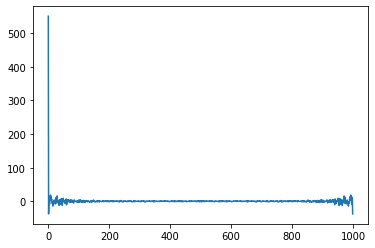

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


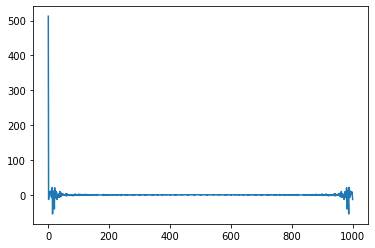

In [ ]:
A = np.fft.fft(Acc_ax)
plt.plot(A)
plt.show()

B = np.fft.fft(Acc_rax)
plt.plot(B)
plt.show()

In [ ]:
!pip install dtaidistance
 
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np

     |████████████████████████████████| 797 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.3.6-cp37-cp37m-linux_x86_64.whl size=1593635 sha256=5066a8ba146e90431520ce6734167be6ce3b12a7a2b4303240de2cdc5b7f179c
  Stored in directory: /root/.cache/pip/wheels/a4/04/e5/ff7fd821276e7ec68893652d36b6a13f230ecdcafdc3283b3f
Successfully built dtaidistance


(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1ad588f50>,
       dtype=object))

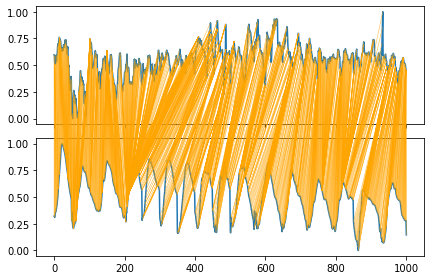

In [ ]:
path = dtw.warping_path(Acc_ax, Acc_rax)
dtwvis.plot_warping(Acc_ax, Acc_rax, path)

(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fe1ad75cb90>])

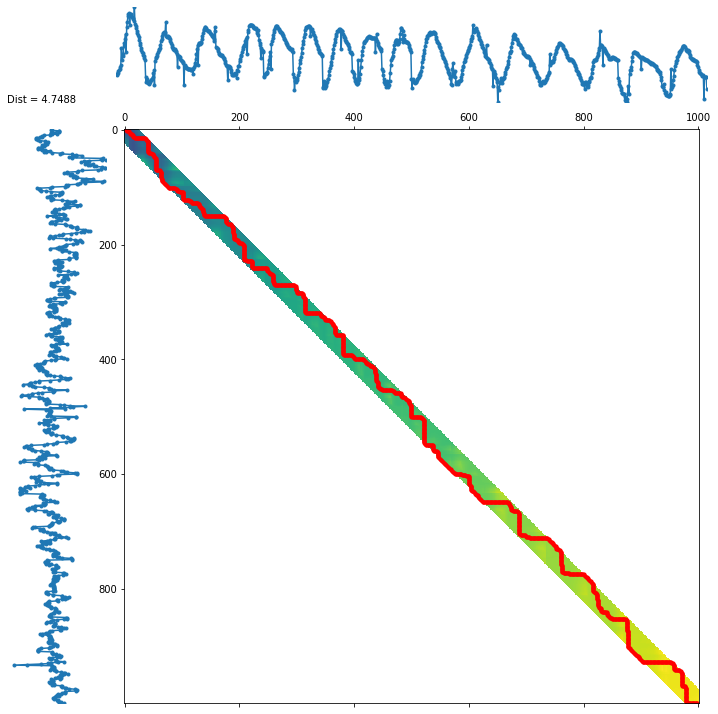

In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random
import numpy as np
x = np.arange(1000)
s1 = Acc_ax
s2 = Acc_rax
random.seed(1)
for idx in range(len(s2)):
    if random.random() < 0.05:
        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

# Data Preparation for training

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.model_selection import KFold
import os
from sklearn.utils import shuffle
import random
from sklearn.preprocessing import MinMaxScaler

data split

In [ ]:
train_path = "Train"
test_path = "Test"


#Place train folders here
train = ['p1','p2','p3','p4']
#Place Vlidation folders here
valid = ['p5','p6']
test = os.listdir(test_path)

train = [train_path+"/"+ X for X in train]
valid = [train_path+"/"+ X for X in valid]
test = [test_path+"/"+X for X in test]

Helping functions

In [ ]:
def get_signal(df,samples,idx):
  """given a dataframe of signals df, returns the idx-th signal
  
  Input
  -------------------------
  df : dataframe of signals
  samples: number of samples per signal
  idx : index of the signal in the df (must be < df.size/samples)

  Output
  -------------------------
  signal : the idx-th signal of the dataframe
  
  """

  signal = df[idx*samples:(idx+1)*samples]
  return signal



def get_signals(df,samples_per_signal):
  """given a dataframe of signals, returns a vector of all signals
  
  Inputs
  -------------------------
  df : dataframe of signals
  samples_per_signal : the number of samples per signal, duh -_-

  Output
  ------------------------
  signals :  a vector of dataframes, each dataframe represents a signal
  """
  signals = []
  for i in range(len(df)//samples_per_signal):
    signals.append(get_signal(df,samples_per_signal,i))
  return signals

def normalize_dataframe(df):
  """performs normalization on a dataframe of signals
  
  Inputs
  -----------------------
  df : a dataframe of signals
  
  Output
  -----------------------
  normalized_df : normalized version of the given dataframe"""

  
  scaler = MinMaxScaler()

  df = scaler.fit_transform(df)
  df = pd.DataFrame(df)
  df.columns = ["aX","aY","aZ","gX","gY","gZ"]
  return df

def clean_dataframe(df):
  """ removes NaN lines from dataframe as they can cause problems during training
  
  Inputs
  ----------------------
  df : dataframe of signals may or may not contain NaN values

  Output
  ----------------------
  clean_df : dataframe of signals without NaN values
  """
  #get empty rows's indexes
  empty_idx = df[df['aX'].isna()].index
  
  #in cas df has no NaN values 
  if(len(empty_idx)==0):
    
    return df
  
  clean_df = df.drop(empty_idx)
  return clean_df

def get_labels(encoded_labels,CLASSES):
  """performs reverse operation of one hot encoding
  
  Input
  -----------------------------
  encoded_labels : np.ndarray of one hot encoded labels
  CLASSES : a list of labels used to perform one hot encoding

  Output
  -----------------------------
  labels : decoded list of labels
  
  """

  encoded_labels = [list(x) for x in encoded_labels]
  labels_idx = [x.index(max(x)) for x in encoded_labels]
  labels = [CLASSES[i] for i in labels_idx]
  return labels

In [ ]:
#train data

SAMPLES_PER_SIGNAL = 50
CLASSES = ["accelerate","slow","stop"]
NUM_GESTURES = 3

ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES).astype(int)

slow_signals = [] 
stop_signals = []
accelerate_signals = []

slow_labels = [] 
stop_labels = []
accelerate_labels = []

for folder in train :
  
  files = os.listdir(folder)
  files = [folder+"/"+X for X in files]

  slw_df = pd.read_csv(files[0])
  stp_df = pd.read_csv(files[1])
  acc_df = pd.read_csv(files[2])

  slw_df = clean_dataframe(slw_df)
  stp_df = clean_dataframe(stp_df)
  acc_df = clean_dataframe(acc_df)

  slw_df = normalize_dataframe(slw_df)
  stp_df = normalize_dataframe(stp_df)
  acc_df = normalize_dataframe(acc_df)

  slw_sigs = get_signals(slw_df,SAMPLES_PER_SIGNAL)
  stp_sigs = get_signals(stp_df,SAMPLES_PER_SIGNAL)
  acc_sigs = get_signals(acc_df,SAMPLES_PER_SIGNAL)

  slow_signals += slw_sigs
  stop_signals += stp_sigs
  accelerate_signals += acc_sigs

  slow_labels += [ONE_HOT_ENCODED_GESTURES[1] for i in range(len(slw_sigs))]
  stop_labels += [ONE_HOT_ENCODED_GESTURES[2] for i in range(len(stp_sigs))]
  accelerate_labels += [ONE_HOT_ENCODED_GESTURES[0] for i in range(len(acc_sigs))]


X_train = np.concatenate([accelerate_signals,slow_signals,stop_signals])
y_train = np.concatenate([accelerate_labels,slow_labels,stop_labels])

#just to makes sure
print(X_train.shape)
print(y_train.shape)

X_train, y_train = shuffle(X_train, y_train, random_state=0)

(852, 50, 6)
(852, 3)


In [ ]:
#valid data

SAMPLES_PER_SIGNAL = 50
CLASSES = ["accelerate","slow","stop"]
NUM_GESTURES = 3

ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES).astype(int)

slow_signals = [] 
stop_signals = []
accelerate_signals = []

slow_labels = [] 
stop_labels = []
accelerate_labels = []

for folder in valid :
  
  files = os.listdir(folder)
  files = [folder+"/"+X for X in files]

  slw_df = pd.read_csv(files[0])
  stp_df = pd.read_csv(files[1])
  acc_df = pd.read_csv(files[2])

  slw_df = clean_dataframe(slw_df)
  stp_df = clean_dataframe(stp_df)
  acc_df = clean_dataframe(acc_df)

  slw_df = normalize_dataframe(slw_df)
  stp_df = normalize_dataframe(stp_df)
  acc_df = normalize_dataframe(acc_df)

  slw_sigs = get_signals(slw_df,SAMPLES_PER_SIGNAL)
  stp_sigs = get_signals(stp_df,SAMPLES_PER_SIGNAL)
  acc_sigs = get_signals(acc_df,SAMPLES_PER_SIGNAL)

  slow_signals += slw_sigs
  stop_signals += stp_sigs
  accelerate_signals += acc_sigs

  slow_labels += [ONE_HOT_ENCODED_GESTURES[1] for i in range(len(slw_sigs))]
  stop_labels += [ONE_HOT_ENCODED_GESTURES[2] for i in range(len(stp_sigs))]
  accelerate_labels += [ONE_HOT_ENCODED_GESTURES[0] for i in range(len(acc_sigs))]


X_valid = np.concatenate([accelerate_signals,slow_signals,stop_signals])
y_valid = np.concatenate([accelerate_labels,slow_labels,stop_labels])

#just to makes sure
print(X_valid.shape)
print(y_valid.shape)

X_valid, y_valid = shuffle(X_valid, y_valid, random_state=0)

(120, 50, 6)
(120, 3)


In [ ]:
#Test Dataset


SAMPLES_PER_SIGNAL = 50
CLASSES = ["accelerate","slow","stop"]
NUM_GESTURES = 3

ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES).astype(int)

slow_signals = [] 
stop_signals = []
accelerate_signals = []

slow_labels = [] 
stop_labels = []
accelerate_labels = []

for folder in test :
  
  files = os.listdir(folder)
  files = [folder+"/"+X for X in files]

  slw_df = pd.read_csv(files[0])
  stp_df = pd.read_csv(files[1])
  acc_df = pd.read_csv(files[2])

  slw_df = clean_dataframe(slw_df)
  stp_df = clean_dataframe(stp_df)
  acc_df = clean_dataframe(acc_df)

  slw_df = normalize_dataframe(slw_df)
  stp_df = normalize_dataframe(stp_df)
  acc_df = normalize_dataframe(acc_df)

  slw_sigs = get_signals(slw_df,SAMPLES_PER_SIGNAL)
  stp_sigs = get_signals(stp_df,SAMPLES_PER_SIGNAL)
  acc_sigs = get_signals(acc_df,SAMPLES_PER_SIGNAL)

  slow_signals += slw_sigs
  stop_signals += stp_sigs
  accelerate_signals += acc_sigs

  slow_labels += [ONE_HOT_ENCODED_GESTURES[1] for i in range(len(slw_sigs))]
  stop_labels += [ONE_HOT_ENCODED_GESTURES[2] for i in range(len(stp_sigs))]
  accelerate_labels += [ONE_HOT_ENCODED_GESTURES[0] for i in range(len(acc_sigs))]

X_test = np.concatenate([accelerate_signals,slow_signals,stop_signals])
y_test = np.concatenate([accelerate_labels,slow_labels,stop_labels])

print(X_test.shape)
print(y_test.shape)

X_test, y_test = shuffle(X_test, y_test, random_state=0)

(590, 50, 6)
(590, 3)


# Model Training

## Dense Neural network

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae','accuracy'])
history = model.fit(X_train, y_train, epochs=25, batch_size=1, validation_data=(X_test, y_test))

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

In [ ]:
model.evaluate(X_test,y_test)

## LSTM 

In [ ]:
from keras.layers import LSTM
from keras.layers import Dense
INPUT_SHAPE = (50,6)
EPOCHS = 10
BATCH_SIZE = 5
model = Sequential()
model.add(LSTM(6, input_shape=(INPUT_SHAPE)))
model.add(Dense(3, activation='sigmoid'))

In [ ]:
model.compile(loss='mse', optimizer="rmsprop", metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=2, validation_data=(X_test, y_test))

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'r', label='Validation accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy before grid search')
plt.title('validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
model.save("LSTM.h5")

## 1D-ConvNet

In [ ]:
INPUT_SHAPE = (50,6)
EPOCHS = 20
BATCH_SIZE = 1

conv_model = Sequential()
conv_model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=INPUT_SHAPE))
conv_model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu'))

conv_model.add(layers.MaxPooling1D(pool_size=2))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dense(100, activation='relu'))
conv_model.add(layers.Dropout(rate=0.5))
conv_model.add(layers.Dense(3, activation='softmax'))

conv_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
INPUT_SHAPE = (50,6)
EPOCHS = 10
BATCH_SIZE = 5

history = conv_model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test))

# Model Optimization

In [ ]:
! pip install -q tensorflow-model-optimization

     |████████████████████████████████| 234 kB 13.1 MB/s 


In [ ]:
import tensorflow_model_optimization as tfmot
import tempfile
import os
import tensorflow as tf
import numpy as np

from tensorflow import keras

%load_ext tensorboard

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude


batch_size = 1
epochs = 2
validation_split = 0.1

len_data = len(X_train) * (1 - validation_split)
end_step = np.ceil(len_data / batch_size).astype(np.int32) * epochs

pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model, **pruning_params)

model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model_for_pruning.summary()

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_flatten  (None, 300)              1         
 _5 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_dense_1  (None, 50)               30052     
 7 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_1  (None, 15)               1517      
 8 (PruneLowMagnitude)                                           


/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:238: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=False)
/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:218: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:225: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)


                                                                 
 prune_low_magnitude_dense_1  (None, 3)                95        
 9 (PruneLowMagnitude)                                           
                                                                 
Total params: 31,665
Trainable params: 15,863
Non-trainable params: 15,802
_________________________________________________________________


In [ ]:
_, baseline_model_accuracy = model.evaluate(X_test, y_test, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)

_, keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model, keras_file, include_optimizer=False)
print('Saved baseline model to:', keras_file)

Baseline test accuracy: 0.776190459728241
Saved baseline model to: /tmp/tmptaf1pu1g.h5


In [ ]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]
  
model_for_pruning.fit(X_train, y_train,
                  batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1418/1418 [==============================] - 93s 13ms/step - loss: 1.0186 - accuracy: 0.4450 - val_loss: 0.9622 - val_accuracy: 0.4810
Epoch 2/2
1418/1418 [==============================] - 12s 8ms/step - loss: 0.8137 - accuracy: 0.5825 - val_loss: 0.7002 - val_accuracy: 0.6709


In [ ]:
_, model_for_pruning_accuracy = model_for_pruning.evaluate(X_test, y_test, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy) 
print('Pruned test accuracy:', model_for_pruning_accuracy)

Baseline test accuracy: 0.776190459728241
Pruned test accuracy: 0.27619048953056335


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


In [ ]:
#docs_infra: no_execute
%tensorboard --logdir={logdir}

In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', pruned_keras_file)

Saved pruned Keras model to: /tmp/tmpnk1s6i9m.h5


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
pruned_tflite_model = converter.convert()

_, pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(pruned_tflite_file, 'wb') as f:
  f.write(pruned_tflite_model)

print('Saved pruned TFLite model to:', pruned_tflite_file)

INFO:tensorflow:Assets written to: /tmp/tmphx99owqq/assets


Saved pruned TFLite model to: /tmp/tmp0xr89tk1.tflite


In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [ ]:
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(pruned_keras_file)))
print("Size of gzipped pruned TFlite model: %.2f bytes" % (get_gzipped_model_size(pruned_tflite_file)))

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_and_pruned_tflite_model = converter.convert()

_, quantized_and_pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(quantized_and_pruned_tflite_file, 'wb') as f:
  f.write(quantized_and_pruned_tflite_model)

print('Saved quantized and pruned TFLite model to:', quantized_and_pruned_tflite_file)

print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped pruned and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_pruned_tflite_file)))

In [ ]:
import numpy as np

def evaluate_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  # Run predictions on ever y image in the "test" dataset.
  prediction_digits = []
  for i, test_image in enumerate(X_test):
    if i % 1000 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  print('\n')
  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_digits = np.array(prediction_digits)
  accuracy = (prediction_digits == y_test).mean()
  return accuracy

In [ ]:
interpreter = tf.lite.Interpreter(model_content=quantized_and_pruned_tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

x = X_test[0]

x = np.expand_dims(x, axis=0).astype(np.float32)
interpreter.set_tensor(input_index, x)

interpreter.invoke()

output = interpreter.tensor(output_index)
output = output()[0]


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)
  

INFO:tensorflow:Assets written to: /tmp/tmpp3_38ygd/assets


INFO:tensorflow:Assets written to: /tmp/tmpp3_38ygd/assets


Model is 65624 bytes


In [ ]:
!apt-get install xxd

In [ ]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 404,716 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
